# Homework 1 

### Intro

For the homework I have chosen a novel "Mrs. Dalloway" by Virginia Woolf. An original file is available in [my github repo](https://github.com/ansorox/Data-Analysis-II-Homeworks/blob/main/hw1/woolf-mrs_dalloway.txt).

### Preprocessing

In [2]:
import nltk.data
import string
import re
from pymystem3 import Mystem

filename = 'woolf-mrs_dalloway.txt'

# read the original file 
with open(filename, mode='r') as f:
    text = f.read()
    f.close()

# tokenization 
with open(filename.replace('.txt', '-tokenized.txt'), mode='a') as f2:
    sentences = nltk.sent_tokenize(text, language="russian")
    
    # lower and remove punctuation and unwanted spaces
    for s in sentences:
        s = re.sub('\s+', ' ', s)
        s = s.lower()
        s = s.translate(str.maketrans('','', '!\"#$%&\'()*+,–./:;<=>?@[\]^_`{|}~'))
        s_res = s.strip()
        f2.write(s_res + "\n")

f2.close()

# lemmatization
with open(filename.replace('.txt', '-tokenized.txt'), mode='r') as f3:
    lines = f3.readlines()
    f3.close()

with open(filename.replace('.txt', '-lemmatized.txt'), mode='a') as f4:    
    m = Mystem()
    for l in lines:
       lemmas = m.lemmatize(l)
       clean_sentence = ''.join(lemmas)
       f4.write(clean_sentence) 
f4.close()


As a result of this preprocessing we get [a tokenized text](https://github.com/ansorox/Data-Analysis-II-Homeworks/blob/main/hw1/woolf-mrs_dalloway-tokenized.txt) (we will not need this one further) and [a lemmatized text](https://github.com/ansorox/Data-Analysis-II-Homeworks/blob/main/hw1/woolf-mrs_dalloway-lemmatized.txt) that we will be working with. 

## Training a word2vec model

In [3]:
import logging
import gensim.models as gm

# logging to the model
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

file = filename.replace('.txt', '-lemmatized.txt')
data = gm.word2vec.LineSentence(file)

data

Let us first implement some arbitrary parameters and have a look at our model.


In [23]:
%time model_woolf1 = gm.Word2Vec(data, vector_size=300, window=5, min_count=2)

2021-10-01 22:48:39,338 : INFO : collecting all words and their counts
2021-10-01 22:48:39,348 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-10-01 22:48:39,413 : INFO : collected 7872 word types from a corpus of 53881 raw words and 3747 sentences
2021-10-01 22:48:39,414 : INFO : Creating a fresh vocabulary
2021-10-01 22:48:39,457 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 retains 3909 unique words (49.65701219512195%% of original 7872, drops 3963)', 'datetime': '2021-10-01T22:48:39.457586', 'gensim': '4.1.2', 'python': '3.9.2 (v3.9.2:1a79785e3e, Feb 19 2021, 09:06:10) \n[Clang 6.0 (clang-600.0.57)]', 'platform': 'macOS-10.15.7-x86_64-i386-64bit', 'event': 'prepare_vocab'}
2021-10-01 22:48:39,459 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 leaves 49918 word corpus (92.64490265585272%% of original 53881, drops 3963)', 'datetime': '2021-10-01T22:48:39.459216', 'gensim': '4.1.2', 'python': '3.9.2 (v3.9.2:1a79785e3

CPU times: user 1.62 s, sys: 101 ms, total: 1.72 s
Wall time: 1.18 s


In [73]:
# count the number of words in our model
print(len(model_woolf1.wv.index_to_key))

# to have a look in our vocabulary let's print every 10th word
print(sorted([w for w in model_woolf1.wv.index_to_key])[::12])

3909
['-', 'адрес', 'армянин', 'базар', 'бедный', 'безобразный', 'белок', 'бесконечный', 'библиотека', 'благодать', 'близко', 'богач', 'болтать', 'бороться', 'брат', 'бродить', 'буква', 'бы', 'ваза', 'вверх', 'вдребезги', 'великодушно', 'вериться', 'вершина', 'ветер', 'взвешивать', 'взмаливаться', 'видать', 'виндзор', 'власть', 'внешность', 'во-первых', 'возвещать', 'возносить', 'волос', 'воротиться', 'восхитительно', 'вплетаться', 'все', 'вслед', 'встреча', 'второй', 'выбрасываться', 'выжимать', 'выпадать', 'высовывать', 'выть', 'гадать', 'где', 'гигантский', 'глубокий', 'годный', 'гордо', 'горошек', 'гость', 'грелка', 'грохотать', 'гулль', 'давным-давно', 'дарвин', 'двигать', 'девчонка', 'демпстер', 'детишки', 'диван', 'доброта', 'доказывать', 'дом', 'дорожка', 'доход', 'дружба', 'духота', 'едва', 'если', 'жалкий', 'жемчуг', 'живость', 'за', 'завертывать', 'загубить', 'зайти', 'залетный', 'занавес', 'запираться', 'заря', 'затапливать', 'захватывать', 'звенеть', 'зеленый', 'знакомство

### Experimenting with the model

If my model os good enough, I expect it to show the following behavior: 

1. Indentify items of furniture similar words (various types of furniture are frequently mentioned throuhgt the text).

2. Show good results in a task of finding an analogy.

3. Correctly find an element in a list that does not match. 


In [79]:
m1 = model_woolf1
[print(i) for i in m1.wv.most_similar(positive=['кресло'], topn=10)]
print("--")
[print(i) for i in m1.wv.most_similar(positive=["левый", "правый"], negative=["безобразный"], topn=3)]
print("--")
print(m1.wv.doesnt_match("море река озеро ступень".split()))
print(m1.wv.doesnt_match("ковер парень портрет софа скатерть".split()))
print(m1.wv.doesnt_match("кухня музей холл спальня".split()))




('еще', 0.9997553825378418)
('как', 0.9997540712356567)
('в', 0.9997513890266418)
('она', 0.9997509717941284)
('а', 0.9997506737709045)
('но', 0.9997456669807434)
('на', 0.9997449517250061)
('с', 0.9997449517250061)
('так', 0.9997438788414001)
('который', 0.9997438192367554)
--
('сунуть', 0.9659485220909119)
('душистый', 0.9659143686294556)
('цветочный', 0.9658777117729187)
--
ступень
парень
музей


2021-10-01 23:04:09,770 : INFO : collecting all words and their counts
2021-10-01 23:04:09,788 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-10-01 23:04:09,858 : INFO : collected 7872 word types from a corpus of 53881 raw words and 3747 sentences
2021-10-01 23:04:09,859 : INFO : Creating a fresh vocabulary
2021-10-01 23:04:09,880 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 1464 unique words (18.597560975609756%% of original 7872, drops 6408)', 'datetime': '2021-10-01T23:04:09.880534', 'gensim': '4.1.2', 'python': '3.9.2 (v3.9.2:1a79785e3e, Feb 19 2021, 09:06:10) \n[Clang 6.0 (clang-600.0.57)]', 'platform': 'macOS-10.15.7-x86_64-i386-64bit', 'event': 'prepare_vocab'}
2021-10-01 23:04:09,886 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 leaves 43540 word corpus (80.80770587034391%% of original 53881, drops 10341)', 'datetime': '2021-10-01T23:04:09.886750', 'gensim': '4.1.2', 'python': '3.9.2 (v3.9.2:1a79785

CPU times: user 1.15 s, sys: 72.3 ms, total: 1.22 s
Wall time: 803 ms


As we see, the results on the second and the third test are quite good. The results on the task with furniture items are less reasonable, though. 
Let us try to make the window smaller in order to cut the number of function words within the visible context. 

In [87]:
%time model_woolf2 = gm.Word2Vec(data, vector_size=300, window=3, min_count=2)

m2 = model_woolf2
[print(i) for i in m2.wv.most_similar(positive=['кресло'], topn=10)]
print("--")
[print(i) for i in m2.wv.most_similar(positive=["левый", "правый"], negative=["безобразный"], topn=3)]
print("--")
print(m1.wv.doesnt_match("море река озеро ступень".split()))
print(m1.wv.doesnt_match("ковер парень портрет софа скатерть".split()))
print(m1.wv.doesnt_match("кухня музей холл спальня".split()))


2021-10-01 23:57:33,318 : INFO : collecting all words and their counts
2021-10-01 23:57:33,336 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-10-01 23:57:33,424 : INFO : collected 7872 word types from a corpus of 53881 raw words and 3747 sentences
2021-10-01 23:57:33,429 : INFO : Creating a fresh vocabulary
2021-10-01 23:57:33,480 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 retains 3909 unique words (49.65701219512195%% of original 7872, drops 3963)', 'datetime': '2021-10-01T23:57:33.480404', 'gensim': '4.1.2', 'python': '3.9.2 (v3.9.2:1a79785e3e, Feb 19 2021, 09:06:10) \n[Clang 6.0 (clang-600.0.57)]', 'platform': 'macOS-10.15.7-x86_64-i386-64bit', 'event': 'prepare_vocab'}
2021-10-01 23:57:33,481 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 leaves 49918 word corpus (92.64490265585272%% of original 53881, drops 3963)', 'datetime': '2021-10-01T23:57:33.481947', 'gensim': '4.1.2', 'python': '3.9.2 (v3.9.2:1a79785e3

CPU times: user 1.72 s, sys: 349 ms, total: 2.07 s
Wall time: 2.81 s
('еще', 0.9995539784431458)
('как', 0.9995474815368652)
('в', 0.9995442628860474)
('а', 0.9995415210723877)
('но', 0.9995375871658325)
('она', 0.9995371103286743)
('с', 0.999536395072937)
('на', 0.9995362162590027)
('который', 0.999533474445343)
('от', 0.999532163143158)
--
('сунуть', 0.972140908241272)
('цветочный', 0.9720256924629211)
('принимать', 0.9719042181968689)
--
ступень
парень
музей


Sadly, the results did not change. We will now try to increase the number of training epochs.

In [93]:
%time model_woolf3 = gm.Word2Vec(data, vector_size=300, window=5, epochs = 25)
m3 = model_woolf3
[print(i) for i in m2.wv.most_similar(positive=['кресло'], topn=10)]


2021-10-02 00:02:24,243 : INFO : collecting all words and their counts
2021-10-02 00:02:24,253 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-10-02 00:02:24,306 : INFO : collected 7872 word types from a corpus of 53881 raw words and 3747 sentences
2021-10-02 00:02:24,309 : INFO : Creating a fresh vocabulary
2021-10-02 00:02:24,341 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 1464 unique words (18.597560975609756%% of original 7872, drops 6408)', 'datetime': '2021-10-02T00:02:24.341613', 'gensim': '4.1.2', 'python': '3.9.2 (v3.9.2:1a79785e3e, Feb 19 2021, 09:06:10) \n[Clang 6.0 (clang-600.0.57)]', 'platform': 'macOS-10.15.7-x86_64-i386-64bit', 'event': 'prepare_vocab'}
2021-10-02 00:02:24,343 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 leaves 43540 word corpus (80.80770587034391%% of original 53881, drops 10341)', 'datetime': '2021-10-02T00:02:24.343694', 'gensim': '4.1.2', 'python': '3.9.2 (v3.9.2:1a79785

2021-10-02 00:02:26,591 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-10-02 00:02:26,599 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-10-02 00:02:26,617 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-10-02 00:02:26,617 : INFO : EPOCH - 15 : training on 53881 raw words (30779 effective words) took 0.3s, 99180 effective words/s
2021-10-02 00:02:26,781 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-10-02 00:02:26,856 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-10-02 00:02:26,929 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-10-02 00:02:26,931 : INFO : EPOCH - 16 : training on 53881 raw words (30875 effective words) took 0.3s, 100710 effective words/s
2021-10-02 00:02:27,066 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-10-02 00:02:27,102 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-

CPU times: user 5.69 s, sys: 390 ms, total: 6.08 s
Wall time: 4.21 s
('еще', 0.9995539784431458)
('как', 0.9995474815368652)
('в', 0.9995442628860474)
('а', 0.9995415210723877)
('но', 0.9995375871658325)
('она', 0.9995371103286743)
('с', 0.999536395072937)
('на', 0.9995362162590027)
('который', 0.999533474445343)
('от', 0.999532163143158)


[None, None, None, None, None, None, None, None, None, None]

It does not help. We try to increase the `vector_size` parameter and further increase the number of epochs.

In [107]:
%time model_woolf4 = gm.Word2Vec(data, vector_size=1700, window=5, epochs = 100)
m4 = model_woolf4
[print(i) for i in m4.wv.most_similar(positive=['кресло'], topn=10)]

2021-10-02 00:08:53,639 : INFO : collecting all words and their counts
2021-10-02 00:08:53,646 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-10-02 00:08:53,711 : INFO : collected 7872 word types from a corpus of 53881 raw words and 3747 sentences
2021-10-02 00:08:53,714 : INFO : Creating a fresh vocabulary
2021-10-02 00:08:53,747 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 1464 unique words (18.597560975609756%% of original 7872, drops 6408)', 'datetime': '2021-10-02T00:08:53.747652', 'gensim': '4.1.2', 'python': '3.9.2 (v3.9.2:1a79785e3e, Feb 19 2021, 09:06:10) \n[Clang 6.0 (clang-600.0.57)]', 'platform': 'macOS-10.15.7-x86_64-i386-64bit', 'event': 'prepare_vocab'}
2021-10-02 00:08:53,756 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 leaves 43540 word corpus (80.80770587034391%% of original 53881, drops 10341)', 'datetime': '2021-10-02T00:08:53.754966', 'gensim': '4.1.2', 'python': '3.9.2 (v3.9.2:1a79785

2021-10-02 00:08:59,278 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-10-02 00:08:59,309 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-10-02 00:08:59,316 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-10-02 00:08:59,318 : INFO : EPOCH - 15 : training on 53881 raw words (30809 effective words) took 0.3s, 116466 effective words/s
2021-10-02 00:08:59,536 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-10-02 00:08:59,592 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-10-02 00:08:59,607 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-10-02 00:08:59,610 : INFO : EPOCH - 16 : training on 53881 raw words (30737 effective words) took 0.3s, 106882 effective words/s
2021-10-02 00:08:59,937 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-10-02 00:08:59,941 : INFO : worker thread finished; awaiting finish of 1 more threads
2021

2021-10-02 00:09:05,284 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-10-02 00:09:05,286 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-10-02 00:09:05,287 : INFO : EPOCH - 35 : training on 53881 raw words (30770 effective words) took 0.3s, 108314 effective words/s
2021-10-02 00:09:05,502 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-10-02 00:09:05,514 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-10-02 00:09:05,549 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-10-02 00:09:05,550 : INFO : EPOCH - 36 : training on 53881 raw words (30636 effective words) took 0.3s, 118810 effective words/s
2021-10-02 00:09:05,779 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-10-02 00:09:05,799 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-10-02 00:09:05,822 : INFO : worker thread finished; awaiting finish of 0 more threads
2021

2021-10-02 00:09:10,950 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-10-02 00:09:10,951 : INFO : EPOCH - 55 : training on 53881 raw words (30708 effective words) took 0.3s, 110043 effective words/s
2021-10-02 00:09:11,166 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-10-02 00:09:11,216 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-10-02 00:09:11,218 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-10-02 00:09:11,219 : INFO : EPOCH - 56 : training on 53881 raw words (30731 effective words) took 0.3s, 115605 effective words/s
2021-10-02 00:09:11,439 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-10-02 00:09:11,455 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-10-02 00:09:11,492 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-10-02 00:09:11,493 : INFO : EPOCH - 57 : training on 53881 raw words (30744 effective word

2021-10-02 00:09:16,381 : INFO : EPOCH - 75 : training on 53881 raw words (30839 effective words) took 0.3s, 120960 effective words/s
2021-10-02 00:09:16,643 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-10-02 00:09:16,687 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-10-02 00:09:16,710 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-10-02 00:09:16,711 : INFO : EPOCH - 76 : training on 53881 raw words (30660 effective words) took 0.3s, 94559 effective words/s
2021-10-02 00:09:16,973 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-10-02 00:09:16,997 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-10-02 00:09:17,004 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-10-02 00:09:17,005 : INFO : EPOCH - 77 : training on 53881 raw words (30823 effective words) took 0.3s, 106509 effective words/s
2021-10-02 00:09:17,193 : INFO : worker thread finish

2021-10-02 00:09:22,115 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-10-02 00:09:22,132 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-10-02 00:09:22,152 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-10-02 00:09:22,153 : INFO : EPOCH - 96 : training on 53881 raw words (30795 effective words) took 0.3s, 111425 effective words/s
2021-10-02 00:09:22,426 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-10-02 00:09:22,455 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-10-02 00:09:22,493 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-10-02 00:09:22,494 : INFO : EPOCH - 97 : training on 53881 raw words (30722 effective words) took 0.3s, 91135 effective words/s
2021-10-02 00:09:22,702 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-10-02 00:09:22,758 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-

CPU times: user 1min 1s, sys: 1.18 s, total: 1min 2s
Wall time: 29.7 s
('карточка', 0.5359227061271667)
('шаль', 0.5280969142913818)
('диван', 0.5154783129692078)
('парри', 0.5092157125473022)
('красный', 0.49775636196136475)
('кенсингтон', 0.4823766350746155)
('камин', 0.4674049913883209)
('кабинет', 0.46212470531463623)
('носок', 0.44502192735671997)
('столик', 0.43995141983032227)


[None, None, None, None, None, None, None, None, None, None]

Our model provides much more meaningful results now! They are still not perfect though. Let us try to use another algorithm – skip-gram.



In [112]:
%time model_woolf5 = gm.Word2Vec(data, vector_size=1700, window=5, sg=1, epochs = 100)

m5 = model_woolf5
[print(i) for i in m5.wv.most_similar(positive=['кресло'], topn=10)]

2021-10-02 00:15:24,039 : INFO : collecting all words and their counts
2021-10-02 00:15:24,047 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-10-02 00:15:24,112 : INFO : collected 7872 word types from a corpus of 53881 raw words and 3747 sentences
2021-10-02 00:15:24,114 : INFO : Creating a fresh vocabulary
2021-10-02 00:15:24,143 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 1464 unique words (18.597560975609756%% of original 7872, drops 6408)', 'datetime': '2021-10-02T00:15:24.143117', 'gensim': '4.1.2', 'python': '3.9.2 (v3.9.2:1a79785e3e, Feb 19 2021, 09:06:10) \n[Clang 6.0 (clang-600.0.57)]', 'platform': 'macOS-10.15.7-x86_64-i386-64bit', 'event': 'prepare_vocab'}
2021-10-02 00:15:24,144 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 leaves 43540 word corpus (80.80770587034391%% of original 53881, drops 10341)', 'datetime': '2021-10-02T00:15:24.144762', 'gensim': '4.1.2', 'python': '3.9.2 (v3.9.2:1a79785

2021-10-02 00:15:36,068 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-10-02 00:15:36,069 : INFO : EPOCH - 14 : training on 53881 raw words (30780 effective words) took 0.7s, 45391 effective words/s
2021-10-02 00:15:36,610 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-10-02 00:15:36,767 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-10-02 00:15:36,782 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-10-02 00:15:36,783 : INFO : EPOCH - 15 : training on 53881 raw words (30791 effective words) took 0.7s, 43302 effective words/s
2021-10-02 00:15:37,478 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-10-02 00:15:37,619 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-10-02 00:15:37,644 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-10-02 00:15:37,645 : INFO : EPOCH - 16 : training on 53881 raw words (30926 effective words)

2021-10-02 00:15:50,248 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-10-02 00:15:50,288 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-10-02 00:15:50,290 : INFO : EPOCH - 34 : training on 53881 raw words (30784 effective words) took 0.6s, 49416 effective words/s
2021-10-02 00:15:50,784 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-10-02 00:15:50,863 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-10-02 00:15:50,875 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-10-02 00:15:50,877 : INFO : EPOCH - 35 : training on 53881 raw words (30735 effective words) took 0.6s, 52585 effective words/s
2021-10-02 00:15:51,553 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-10-02 00:15:51,726 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-10-02 00:15:51,767 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-1

2021-10-02 00:16:05,899 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-10-02 00:16:05,900 : INFO : EPOCH - 54 : training on 53881 raw words (30759 effective words) took 0.8s, 37968 effective words/s
2021-10-02 00:16:06,428 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-10-02 00:16:06,569 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-10-02 00:16:06,614 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-10-02 00:16:06,616 : INFO : EPOCH - 55 : training on 53881 raw words (30765 effective words) took 0.7s, 43236 effective words/s
2021-10-02 00:16:07,276 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-10-02 00:16:07,377 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-10-02 00:16:07,383 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-10-02 00:16:07,384 : INFO : EPOCH - 56 : training on 53881 raw words (30743 effective words)

2021-10-02 00:16:19,852 : INFO : EPOCH - 74 : training on 53881 raw words (30799 effective words) took 0.7s, 45327 effective words/s
2021-10-02 00:16:20,361 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-10-02 00:16:20,450 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-10-02 00:16:20,487 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-10-02 00:16:20,488 : INFO : EPOCH - 75 : training on 53881 raw words (30837 effective words) took 0.6s, 48634 effective words/s
2021-10-02 00:16:21,029 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-10-02 00:16:21,112 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-10-02 00:16:21,179 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-10-02 00:16:21,180 : INFO : EPOCH - 76 : training on 53881 raw words (30876 effective words) took 0.7s, 44786 effective words/s
2021-10-02 00:16:21,700 : INFO : worker thread finished

2021-10-02 00:16:33,934 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-10-02 00:16:34,058 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-10-02 00:16:34,075 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-10-02 00:16:34,076 : INFO : EPOCH - 95 : training on 53881 raw words (30724 effective words) took 0.8s, 40369 effective words/s
2021-10-02 00:16:34,634 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-10-02 00:16:34,813 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-10-02 00:16:34,841 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-10-02 00:16:34,842 : INFO : EPOCH - 96 : training on 53881 raw words (30759 effective words) took 0.8s, 40465 effective words/s
2021-10-02 00:16:35,393 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-10-02 00:16:35,477 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-1

CPU times: user 2min 41s, sys: 2.19 s, total: 2min 43s
Wall time: 1min 13s
('карточка', 0.38985592126846313)
('парри', 0.3860182762145996)
('гостиница', 0.3647405505180359)
('красный', 0.36451151967048645)
('побеждать', 0.36247310042381287)
('превосходный', 0.3592410385608673)
('йозеф', 0.35566964745521545)
('холл', 0.34594330191612244)
('диван', 0.3456926643848419)
('посреди', 0.3453401029109955)


[None, None, None, None, None, None, None, None, None, None]

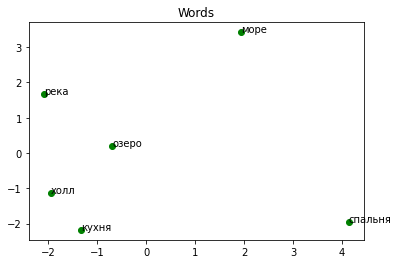

In [122]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

words = ['море', 'река', 'озеро', 'кухня', 'холл', 'спальня']
X = m5.wv[words]

pca = PCA(n_components=2)
coords = pca.fit_transform(X)

plt.scatter(coords[:, 0], coords[:, 1], color='green')
plt.title('Words')

for i, w in enumerate(words):
    plt.annotate(w, xy=(coords[i, 0], coords[i, 1]))
plt.show()
